<h1 align="center"> FYP Live Report </h1>


## Imports and stuff

The library titled py_dss_interface comes with its own version of openDSS and so, we do not need to install openDSS separately.

In [1]:
import py_dss_interface
import os
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import math

Next, we set the path of the dss file. I would prefer to use the python OS module so that writing the path is never an issue again, but unfortunately in live scripts such as these, we are prone to 

In [2]:
dss_file = "C:\\Users\\usman\\OneDrive - Habib University\\Desktop\\Habib University\\Capstone 1\\13Bus\\IEEE13Nodeckt.dss"

print(dss_file)

C:\Users\usman\OneDrive - Habib University\Desktop\Habib University\Capstone 1\13Bus\IEEE13Nodeckt.dss


Creating a variable of the self defined data type as shown

In [3]:
dss = py_dss_interface.DSSDLL()

OpenDSS Started successfully! 
OpenDSS Version 9.4.0.1 (64-bit build); License Status: Open 




Compiling the script, which is automatically executed due to "solve" command in the code

In [4]:
dss.text(f"compile [{dss_file}]")


''

Next, we try to get the voltages, powers, and currents at every node in the circuit. Next, we will attempt to do a timeseries simulation of the circuit where we will sweep one load's values over some duration an examine the effects on the parameters of other components.


In [5]:
loads = [
"Load.671",
"Load.634a",
"Load.634b",
"Load.634c",
"Load.645",
"Load.646",
"Load.692",
"Load.675a",
"Load.675b",
"Load.675c",
"Load.611",
"Load.652",
"Load.670a",
"Load.670b",
"Load.670c"
]

lines = [
"Line.650632",
"Line.632670",
"Line.670671",
"Line.671680",
"Line.632633",
"Line.632645",
"Line.645646",
"Line.692675",
"Line.671684",
"Line.684611",
"Line.684652",
"Line.671692"
]

caps = [
"Capacitor.Cap1",
"Capacitor.Cap2"
]

transformers = [
"Transformer.Sub",
"Transformer.XFM1",
"Transformer.Reg1",
"Transformer.Reg2",
"Transformer.Reg3"
]

regulators = [
"regcontrol.Reg1",
"regcontrol.Reg2",
"regcontrol.Reg3"
]

elements = lines

In [6]:
def show_before_and_after(dict, item, parameter):
    fig, ax = plt.subplots(figsize=(6,6))
    for i in range(0, len(dict[item][parameter][0]), 2):
        ax.arrow(0, 0, dict[item][parameter][0][i], dict[item][parameter][0][i+1], head_width=10, head_length=10, fc='blue', ec='blue')
        ax.arrow(0, 0, dict[item][parameter][1][i], dict[item][parameter][1][i+1], head_width=10, head_length=10, fc='red', ec='red')
    ax.grid(True)
    #ax.legend(['Before'])
    ax.legend(['Before', 'After'])
    ax.set_xlabel('Real Axis (A)')
    ax.set_ylabel('Imaginary Axis (A)')
    title = 'Complex ' + parameter + ' Before ' + 'and After'
    ax.set_title(title)
    plt.show(block=False)

In [7]:
def show_voltages(col):
    buses_list = dss.circuit_all_node_names()
    bus_voltages = dss.circuit_all_bus_vmag_pu()
    fig = plt.figure(figsize = (75, 5))
    plt.bar(buses_list, bus_voltages, color =col)
    plt.xlabel("Nodes")
    plt.ylabel("Voltage (reference to ground in V)")
    plt.title("Voltage at each node in the circuit")
    plt.show(block=False)
    return

In [8]:
def store_values():
    for load in loads:
        dss.circuit_set_active_element(load) 
        load_dict[load]["current"].append(dss.cktelement_currents())
        load_dict[load]["power"].append(dss.cktelement_powers())
    for line in lines:
        dss.circuit_set_active_element(line) 
        line_dict[line]["current"].append(dss.cktelement_currents())
        line_dict[line]["power"].append(dss.cktelement_powers())
    for cap in caps:
        dss.circuit_set_active_element(cap) 
        cap_dict[cap]["current"].append(dss.cktelement_currents())
        cap_dict[cap]["power"].append(dss.cktelement_powers())
    for transformer in transformers:
        dss.circuit_set_active_element(transformer) 
        transformer_dict[transformer]["current"].append(dss.cktelement_currents())
        transformer_dict[transformer]["power"].append(dss.cktelement_powers())
    for regulator in regulators:
        dss.circuit_set_active_element(regulator) 
        regulator_dict[regulator]["current"].append(dss.cktelement_currents())
        regulator_dict[regulator]["power"].append(dss.cktelement_powers())

change_loads function is used to change the load values of the circuit. The function takes in the name of the load, the phase, and the value to be changed to. The function then changes the load value and then solves the circuit. The function returns the voltages, powers, and currents at every node in the circuit.

In [9]:
def change_loads(load, value):
    dss.text(f"compile [{dss_file}]")
    dss.text(f"solve") 
    dss.circuit_set_active_element(load) 
    dss.loads_write_name(load.split(".")[-1]) 
    dss.loads_write_kw(value) 
    dss.text(f"solve")
    show_voltages("red")
    store_values() 

In [10]:
def make_dicts():
    load_dict = {}
    for load in loads:
        load_dict[load] = {"power":[], "current":[]}
    line_dict = {}
    for line in lines:
        line_dict[line] = {"power":[], "current":[]}
    cap_dict = {}
    for cap in caps:
        cap_dict[cap] = {"power":[], "current":[]}
    transformer_dict = {}
    for transformer in transformers:
        transformer_dict[transformer] = {"power":[], "current":[]}
    regulator_dict = {}
    for regulator in regulators:
        regulator_dict[regulator] = {"power":[], "current":[]} 
    return load_dict, line_dict, cap_dict, transformer_dict, regulator_dict
    

In [11]:
def make_change(ld, val):
    dss.text(f"compile [{dss_file}]") 
    dss.text(f"solve")
    show_voltages("blue")
    #store_values()
    change_loads(ld, val)
    

In [12]:
def bruteforce_placement():
    for _ in loads:
        make_change(_, 1155)

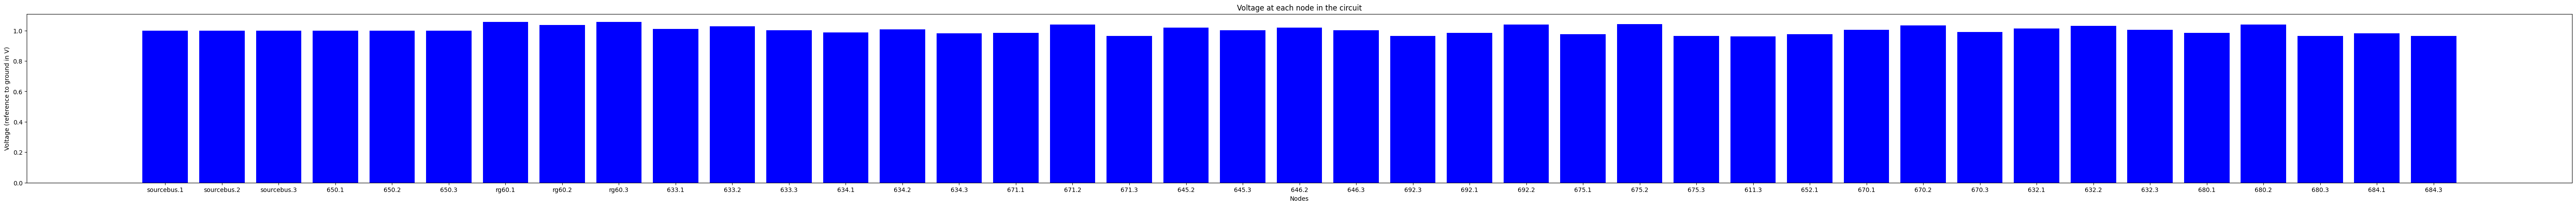

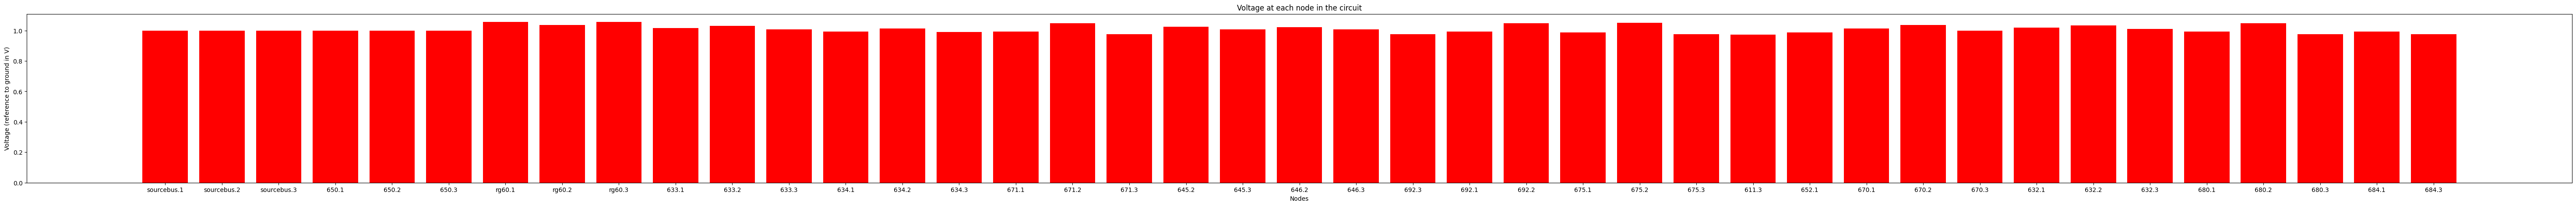

{'Load.671': {'power': [[252.24381572433597, 135.4658752954871, 258.093949797456, 156.7869784195084, 244.66690907605144, 139.19188713624587], [252.24381572433597, 135.4658752954871, 258.093949797456, 156.7869784195084, 244.66690907605144, 139.19188713624587]], 'current': [[100.39562753654923, -65.5946711553314, -106.98570924883501, -54.20174499528654, 6.59008171228578, 119.79641615061794], [100.39562753654923, -65.5946711553314, -106.98570924883501, -54.20174499528654, 6.59008171228578, 119.79641615061794]]}, 'Load.634a': {'power': [[159.9997387338386, 110.00447994911563, 0.0, 0.0], [159.9997387338386, 110.00447994911563, 0.0, 0.0]], 'current': [[559.1204059879263, -430.20243855644674, -559.1204059879263, 430.20243855644674], [559.1204059879263, -430.20243855644674, -559.1204059879263, 430.20243855644674]]}, 'Load.634b': {'power': [[119.99949492341024, 89.99824735899337, 0.0, 0.0], [119.99949492341024, 89.99824735899337, 0.0, 0.0]], 'current': [[-498.5459322445612, -192.6622947261754, 

In [13]:
load_dict, line_dict, cap_dict, transformer_dict, regulator_dict = make_dicts()
make_change("Load.671", 755)
store_values()
#print(load_dict["Load.671"]["current"])
#show_before_and_after(load_dict, "Load.671", "current")
print(load_dict)

In [14]:
def store_values():
    for load in loads:
        dss.circuit_set_active_element(load) 
        load_dict[load]["current"].append(dss.cktelement_currents())
        load_dict[load]["power"].append(dss.cktelement_powers())
    for line in lines:
        dss.circuit_set_active_element(line) 
        line_dict[line]["current"].append(dss.cktelement_currents())
        line_dict[line]["power"].append(dss.cktelement_powers())
    for cap in caps:
        dss.circuit_set_active_element(cap) 
        cap_dict[cap]["current"].append(dss.cktelement_currents())
        cap_dict[cap]["power"].append(dss.cktelement_powers())
    for transformer in transformers:
        dss.circuit_set_active_element(transformer) 
        transformer_dict[transformer]["current"].append(dss.cktelement_currents())
        transformer_dict[transformer]["power"].append(dss.cktelement_powers())
    for regulator in regulators:
        dss.circuit_set_active_element(regulator) 
        regulator_dict[regulator]["current"].append(dss.cktelement_currents())
        regulator_dict[regulator]["power"].append(dss.cktelement_powers())

def change_loads(load, value):
    dss.text(f"compile [{dss_file}]")
    dss.text(f"solve") 
    #dss.circuit_set_active_element(load) 
    dss.loads_write_name(load.split(".")[-1]) 
    dss.loads_write_kw(value) 
    dss.text(f"solve")
    store_values() 
     

def timeseries_load_parse(ld, arr, param):
    for i in range(len(arr)):
        change_loads(ld, arr[i])
        

In [15]:
load_dict, line_dict, cap_dict, transformer_dict, regulator_dict = make_dicts()
timeseries_load_parse("Load.671", [i*100 for i in range (1,11)], "kw")
print(load_dict["Load.671"]["current"])

[[13.254634274136464, -8.407410781481037, -13.90665816361276, -7.282714551270809, 0.6520238894762969, 15.690125332751846], [26.538306603100782, -16.91134210081399, -27.910734031372062, -14.542629637935795, 1.3724274282712798, 31.453971738749782], [39.688961831980336, -25.3891796569576, -41.82928355787042, -21.696504403086095, 2.140321725890084, 47.0856840600437], [52.9771477179861, -34.0464445356519, -55.9685740909518, -28.882853694333836, 2.9914263729656945, 62.92929822998573], [66.29533019547694, -42.80328630191946, -70.20841214305936, -36.0456797384077, 3.9130819475824374, 78.84896604032716], [79.6439649353333, -51.661251033480355, -84.55032671645093, -43.18459817289502, 4.906361781117624, 94.84584920637538], [93.02351955075255, -60.62192784084165, -98.9958882175181, -50.29921323423744, 5.972368666765551, 110.92114107507909], [106.43447389908425, -69.68695043152833, -113.54670986676541, -57.389117230258535, 7.1122359676811655, 127.07606766178688], [119.87784505842865, -78.8587669547

# ON HOLD FOR A WHILE

In [20]:
def show_time_series_results(dict, item, parameter):
    fig, ax = plt.subplots(figsize=(6,6))
    x = []
    for i in range(0, len(dict[item][parameter][0]), 2):
        x.append(math.sqrt(dict[item][parameter][0][i]**2 + dict[item][parameter][0][i+1]**2))
    y = list(range(len(x)))
    print(x)
    print(y)
    fig, ax = plt.subplots()
    ax.plot(x, y)
    ax.set_xlabel("time")
    ax.set_ylabel(parameter)
    title = "Time series of " + parameter + " for " + item
    ax.set_title(title)
    plt.show()

[[33.41661293311929, 17.872454635216812, 34.16793550867644, 20.821279703286912, 32.41523155810885, 18.448498842026634], [66.81169037299813, 35.747616917276304, 68.38559160918413, 41.658371900914304, 64.80223613170726, 36.87835986593799], [100.37896209872248, 53.8069786806804, 102.20633690671642, 62.19500251686957, 97.4162934007602, 55.43647089000673], [133.79548608104108, 71.74886308484798, 136.3751348857344, 82.95645552571601, 129.83180122941792, 73.87862647194736], [167.18995211236393, 89.69372128807665, 170.5952091321508, 103.73337664008656, 162.21809778797925, 92.30178495532044], [200.56204693395176, 107.64145611640511, 204.8673478586566, 124.52611928469462, 194.57460449400315, 110.70552172577273], [233.91144441804957, 125.59196014074065, 239.19235849057574, 145.3350422449344, 226.90072200768464, 129.08939294851749], [267.23780463500907, 143.54511496276183, 273.5710679782444, 166.1605095656522, 259.1958290371509, 147.45293451192097], [300.53973120333603, 161.50723904099786, 307.999

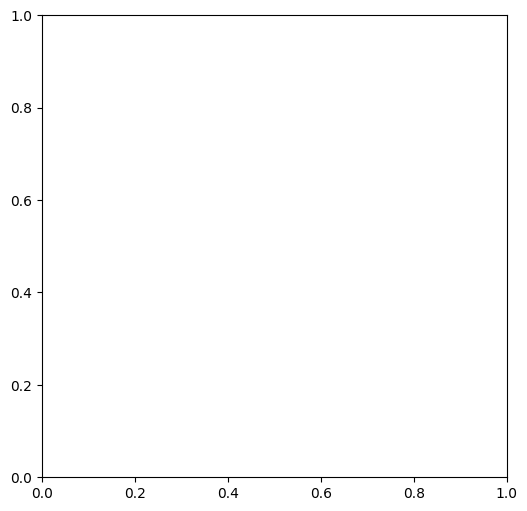

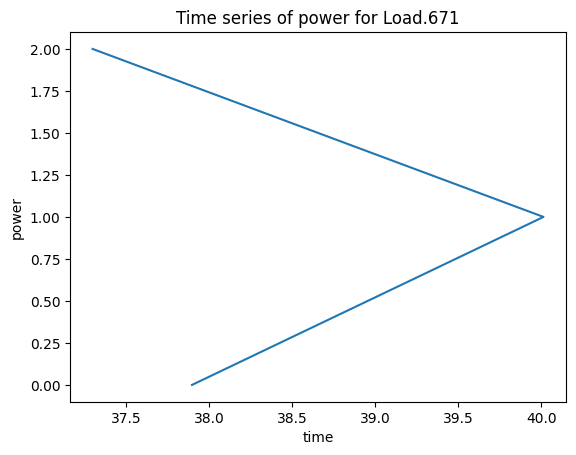

In [21]:

dss.text(f"compile [{dss_file}]") 
dss.text(f"solve")
store_values()
#timeseries_simulation()
print(load_dict["Load.671"]["power"])
show_time_series_results(load_dict, "Load.671", "power")

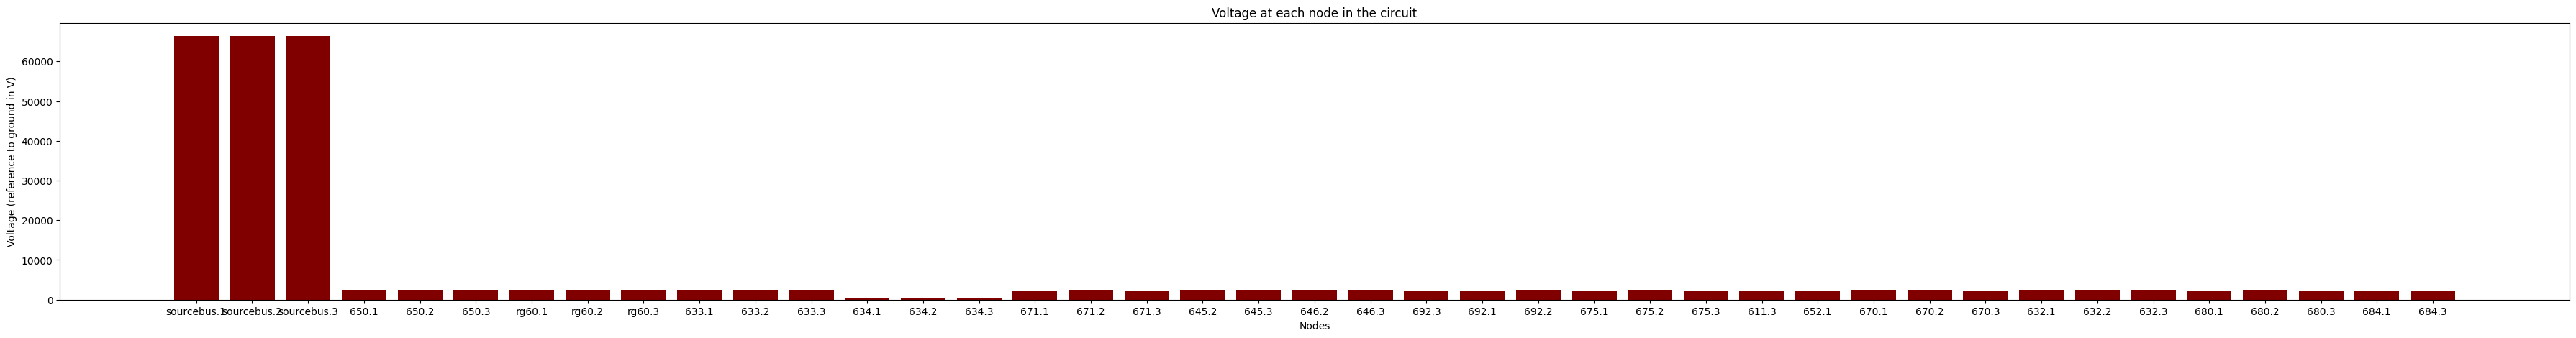

In [22]:
buses_list = dss.circuit_all_node_names()
bus_voltages = dss.circuit_all_bus_vmag()

fig = plt.figure(figsize = (45, 5))
 
plt.bar(buses_list, bus_voltages, color ='maroon')
 
plt.xlabel("Nodes")
plt.ylabel("Voltage (reference to ground in V)")
plt.title("Voltage at each node in the circuit")
plt.show()


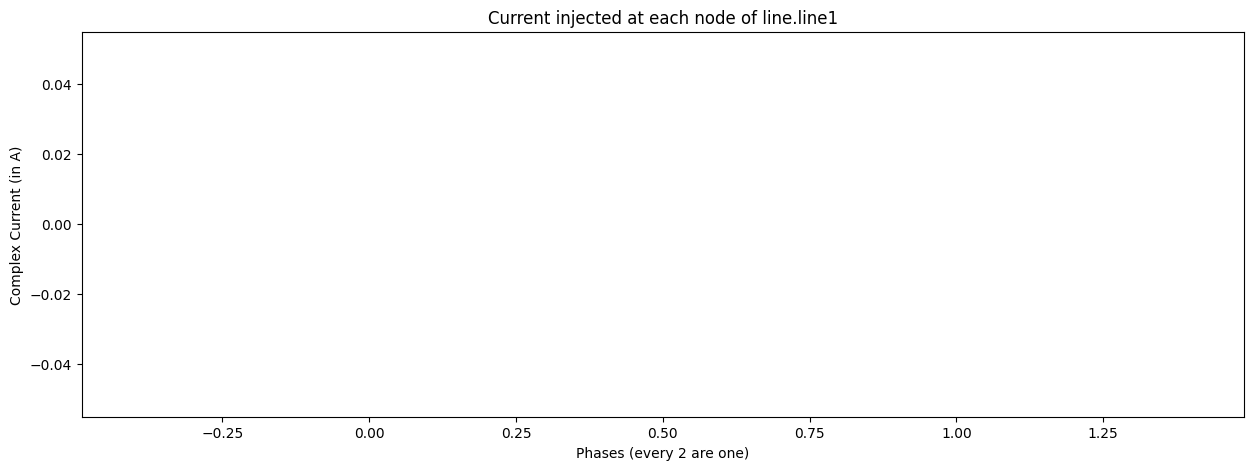

<Figure size 640x480 with 0 Axes>

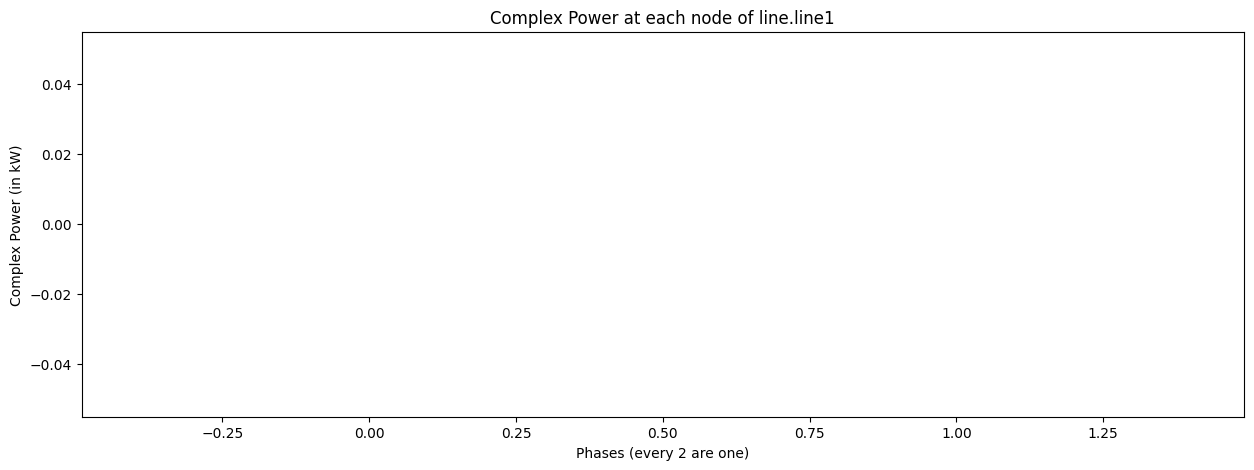

<Figure size 640x480 with 0 Axes>

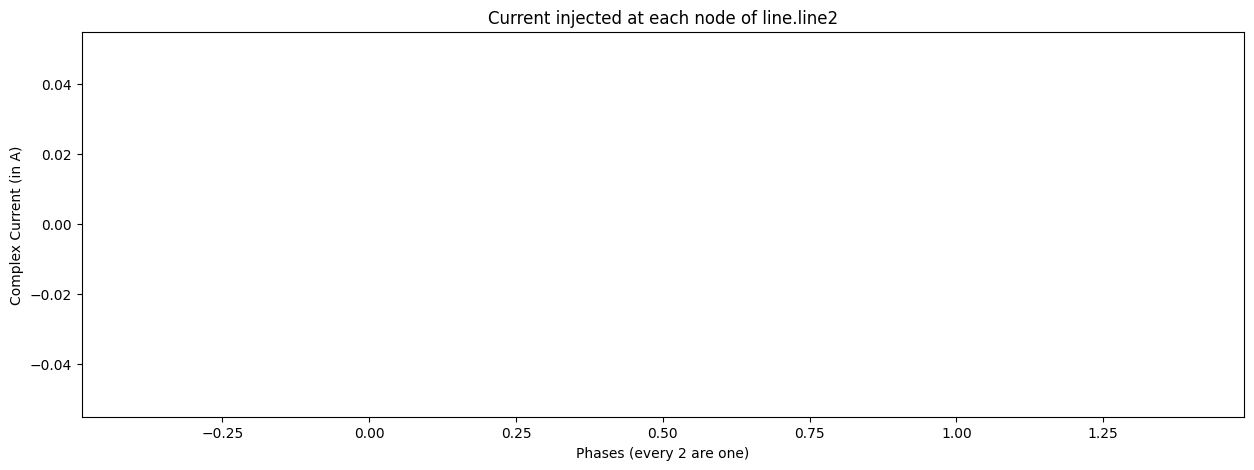

<Figure size 640x480 with 0 Axes>

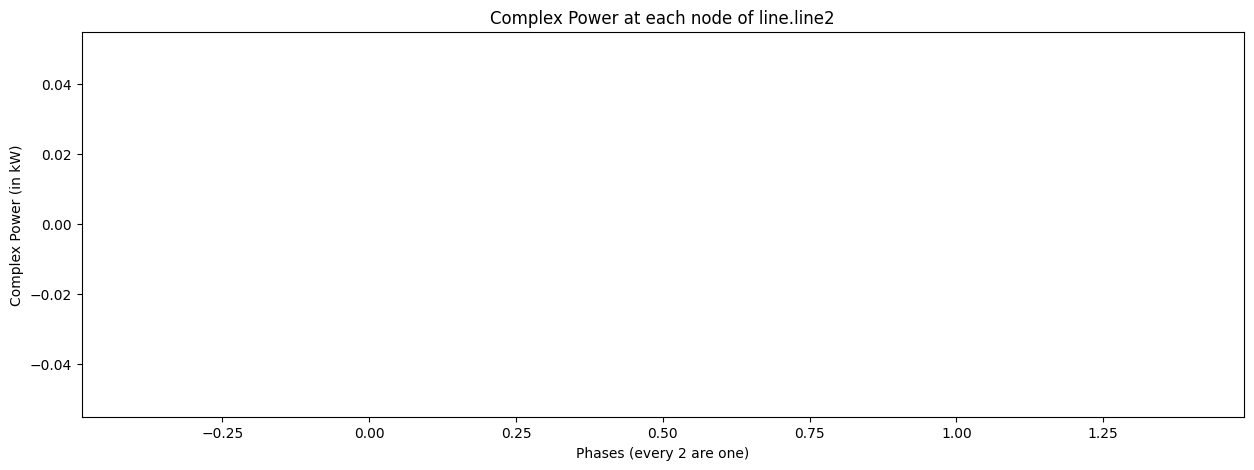

<Figure size 640x480 with 0 Axes>

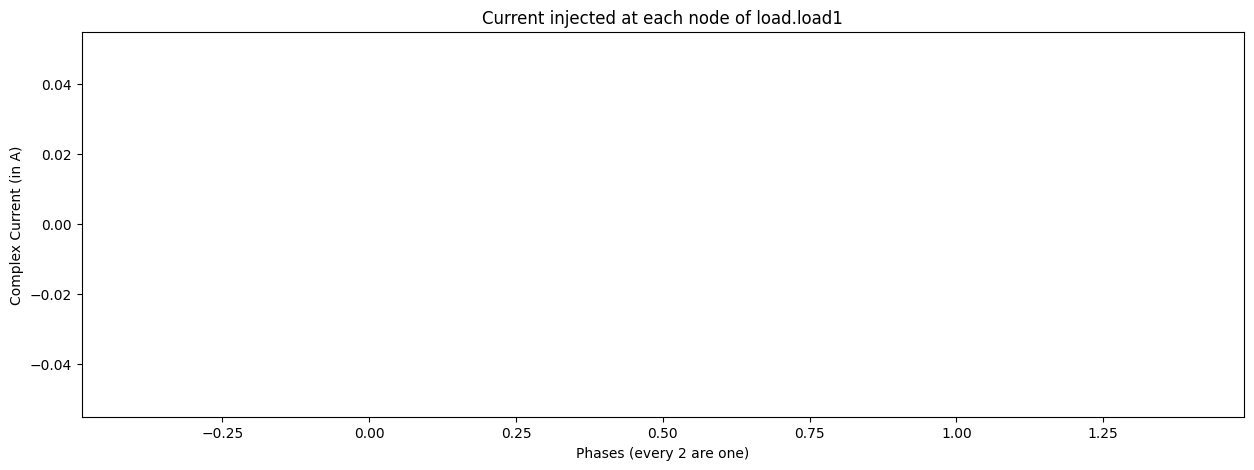

<Figure size 640x480 with 0 Axes>

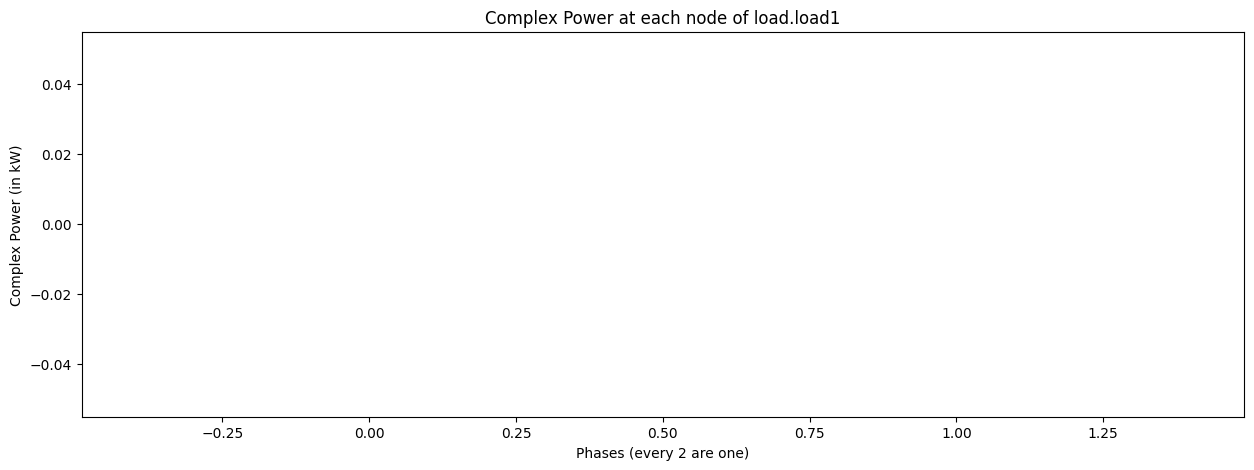

<Figure size 640x480 with 0 Axes>

In [23]:
elements = ["line.line1", "line.line2", "load.load1"]

for element in elements:
    dss.circuit_set_active_element(element)
    powers = dss.cktelement_powers()
    currents = dss.cktelement_currents()

    fig = plt.figure(figsize = (15, 5))
 
    plt.bar([i for i in range(len(currents))], currents, color ='blue')
    
    plt.xlabel("Phases (every 2 are one)")
    plt.ylabel("Complex Current (in A)")
    title = "Current injected at each node of " + element
    plt.title(title)
    plt.show()

    plt.savefig(title+".jpg")

    fig = plt.figure(figsize = (15, 5))
 
    plt.bar([i for i in range(len(currents))], powers, color ='green')
    
    plt.xlabel("Phases (every 2 are one)")
    plt.ylabel("Complex Power (in kW)")
    title = "Complex Power at each node of " + element
    plt.title(title)
    plt.show()

    plt.savefig(title+".jpg")


For our next experiment, we will perform a load sweep, and try determine the effect of increasing load on the aforementioned categories. Unfortunately, we were unable to do this, because this particular test system forces the P and Q to remain constant until the voltage per unit falls below 0.75. In other words 